### Welcome to 'InsureTech Innovate', a groundbreaking insurance firm located in the tech-driven district of Silicon Heights. You've recently been hired as a Machine Learning Engineer, primarily because of the challenges the firm faces with their current prediction models on insurance charges. The company aims to provide tailored insurance plans to customers based on a myriad of factors, but the existing models are not predicting charges with the desired accuracy. Your direct supervisor, Julia, the Chief Data Analyst, believes that TensorFlow might be the answer to refining these predictions. She's handed you a dataset that encompasses diverse customer profiles and their associated insurance charges. Julia expects you to harness TensorFlow's capabilities to develop an enhanced prediction model and demonstrate its superiority over the current system. The success of this project is pivotal, as it could revolutionize the way 'InsureTech Innovate' designs its insurance packages, ensuring more personalized and cost-effective plans for its clients.

### Load and Analyze the "insurance.csv" Dataset
Given the importance of understanding our insurance dataset, the goal of this task is to load the dataset and perform an initial analysis. The steps to achieve this are outlined below:

#### Import key Python libraries: TensorFlow, Pandas, and Matplotlib.

### Load the dataset named "insurance.csv" into a DataFrame.

Provide a quick glance of the dataset by displaying the first few rows.

Generate a statistical summary of the dataset to assess its structure, distribution, and main statistical properties.

In [18]:
# Importing the required libraries for data manipulation and visualization
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Loading the "insurance.csv" dataset into a pandas DataFrame
df = pd.read_csv("insurance.csv")

In [20]:
# Displaying the initial rows of the dataset for a basic understanding
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
# Creating a statistical summary to better understand the dataset's properties
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Prepare the Dataset for Machine Learning Analysis
The primary aim of this task is to ensure that the insurance dataset is aptly prepared for machine learning models. This involves several essential steps:

Convert categorical variables into numerical format.

Delineate the dataset into features (X) and target variable (y).

Split the dataset into training and test sets.

In [23]:
# Sample DataFrame
data = {
    'age': [19, 18, 28, 33, 32],
    'sex': ['female', 'male', 'male', 'male', 'male'],
    'bmi': [27.9, 33.77, 33.0, 22.705, 28.88],
    'children': [0, 1, 3, 0, 0],
    'smoker': ['yes', 'no', 'no', 'no', 'no'],
    'region': ['southwest', 'southeast', 'southeast', 'northwest', 'northwest'],
    'charges': [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]
}
df = pd.DataFrame(data)

# Step 1: Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns identified:", categorical_cols)

# Step 2: Apply one-hot encoding to these columns
df_one_hot = pd.get_dummies(df, columns=categorical_cols)

# Step 3: Convert boolean values to integers
df_one_hot = df_one_hot.astype(int)

# Step 4: View the head of the resulting DataFrame
print("\nDataFrame after One-Hot Encoding:")

Categorical columns identified: Index(['sex', 'smoker', 'region'], dtype='object')

DataFrame after One-Hot Encoding:


In [24]:
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,1
1,18,33,1,1725,0,1,1,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,1,0
3,33,22,0,21984,0,1,1,0,1,0,0
4,32,28,0,3866,0,1,1,0,1,0,0


In [25]:
# Isolate 'X' and target variable 'y'
X = df_one_hot.drop("charges", axis=1)
y = df_one_hot["charges"]

In [26]:
# Importing the required function for data splitting
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and test subsets 
# Ensuring reproducible splits with a set random state
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1502)
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,1
1,18,33,1,0,1,1,0,0,1,0
4,32,28,0,0,1,1,0,1,0,0
2,28,33,3,0,1,1,0,0,1,0


Construct and Evaluate a Neural Network Model
Your objective is to build, train, and evaluate a neural network model for the insurance dataset, adhering to the specific architecture and parameters described below:

Establish a neural network with a sequential structure that consists of two dense layers. Each layer should contain one neuron.

Configure the model with Mean Absolute Error (MAE) as the loss function and the Stochastic Gradient Descent (SGD) optimizer for the compilation step.

Train the model using the provided training dataset for a duration of 100 epochs and set the verbose parameter to 1 or 0.

Once trained, evaluate the model's performance against the test dataset to ascertain its predictive accuracy.

In [27]:
# Define a sequential neural network with two dense layers, each having one neuron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='linear'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [29]:
# Compile the model using MAE as the loss function and SGD as the optimizer
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [30]:
# Fit the neural network model to the training data over 100 epochs
model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 6746.4541 - mae: 6746.4541
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 6710.1504 - mae: 6710.1504
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 6671.8726 - mae: 6671.8726
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 6609.9756 - mae: 6609.9756
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 6495.1465 - mae: 6495.1465
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 6275.5405 - mae: 6275.5405
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 5852.9873 - mae: 5852.9873
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 5038.9658 - mae: 5038.9658
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 4175.4985 - mae: 4175.4985
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 4414.5371 - mae: 4414.5371
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 4386.3291 - mae: 4386.3291
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - lo

In [31]:
# Evaluate the trained model using the test dataset
evaluation_results = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - loss: 19137.9590 - mae: 19137.9590


Design, Train, Evaluate, and Visualize a Multi-Layer Neural Network
Your objective is to develop an enhanced neural network model for the insurance dataset with a specific architecture that contains multiple layers and more units. Upon training the model, evaluate its performance against the test dataset. Lastly, visualize the model's training progress over epochs. Here are the step-by-step instructions:

Design a neural network with three layers: the first containing 100 units, the second 10 units, and the last one unit.

Compile the model using the Mean Absolute Error (MAE) as the loss function and the Adam optimizer.

Train the model on the provided training dataset for 100 epochs and save its training history.

Evaluate the model's performance on the test dataset to determine its prediction accuracy.

Generate a visualization of the model's training progress across epochs using a loss curve.

In [32]:
# Create a multi-layer neural network with increased units
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [33]:
# Compile the model using MAE as the loss function and Adam as the optimizer
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

In [34]:
# Fit the model on the training dataset and store its history
history = model_2.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 6727.9033 - mae: 6727.9033
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 6727.5742 - mae: 6727.5742
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 6727.2114 - mae: 6727.2114
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 6726.7373 - mae: 6726.7373
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 6726.2373 - mae: 6726.2373
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 6725.7266 - mae: 6725.7266
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 6725.2051 - mae: 6725.2051
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 6724.6729 - mae: 6724.6729
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 6724.1323 - mae: 6724.1323
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 6723.5850 - mae: 6723.5850
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 6723.0312 - mae: 6723.0312
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 6

In [35]:
# Assess the model's predictive accuracy using the test dataset
evaluation_results_2 = model_2.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - loss: 21815.2695 - mae: 21815.2695


Text(0.5, 0, 'epochs')

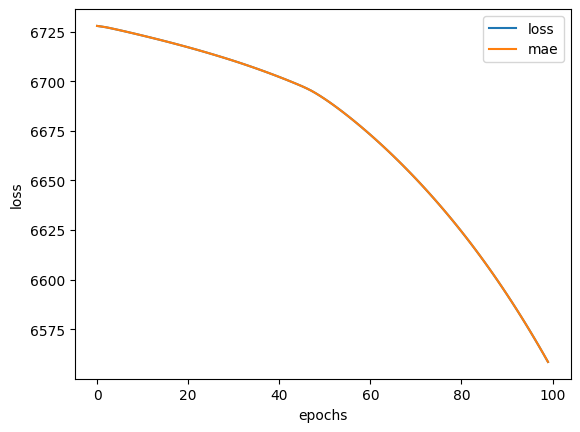

In [36]:
# Plot the training history (loss curve) to understand model convergence
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Extend and Analyze the Training for the Multi-Layer Neural Network Model
The primary objective is to further enhance the predictive accuracy of the model_2 neural network, which was previously trained for 100 epochs. To accomplish this:

Continue the training of model_2 for an additional 100 epochs and verbose 0 or 1.

Assess the model's performance after the extended training using the test dataset.

Construct a visualization that depicts the model's training progression across the new epochs by rendering a loss curve.

In [37]:
# Extend training for model_2 by another 100 epochs
history_2 = model_2.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 6554.3555 - mae: 6554.3555
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 6550.1650 - mae: 6550.1650
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 6545.9014 - mae: 6545.9014
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 6541.5654 - mae: 6541.5654
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 6537.1533 - mae: 6537.1533
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 6532.6655 - mae: 6532.6655
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 6528.1011 - mae: 6528.1011
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 6523.4585 - mae: 6523.4585
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 6518.7358 - mae: 6518.7358
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 6513.9341 - mae: 6513.9341
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 6509.0508 - mae: 6509.0508
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - los

In [38]:
# Assess the model's predictive capabilities after 200 total epochs of training
extended_evaluation_results = model_2.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 20901.2598 - mae: 20901.2598


Text(0.5, 0, 'epochs')

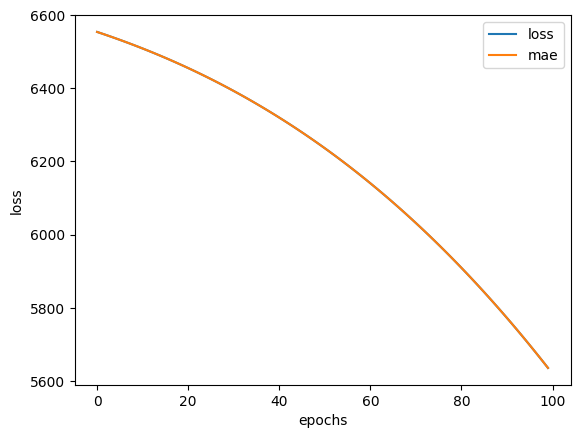

In [39]:
# Visualize the loss across the additional 100 epochs to understand model refinement
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Construct and Train a Neural Network on Normalized and Encoded Data
The goal is to preprocess the insurance dataset by normalizing its numerical attributes and encoding its categorical ones. Once this is done, design and train a neural network model using this preprocessed data. The process involves:

Setting up transformations to normalize numeric columns and one-hot encode categorical columns.

Designing a neural network with specified architecture.

Compiling and training the constructed model with the preprocessed training data.

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [41]:
# Set up the column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # Normalize numeric columns
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])  # One-hot encode categorical columns
)

In [42]:
# Separate features from the target
X = df.drop("charges", axis=1)
y = df["charges"]
 
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1502)
X_test.head()

,age,sex,bmi,children,smoker,region
3,33,male,22.705,0,no,northwest


In [43]:
# Fit the column transformer on training data
ct.fit(X_train)
 
# Transform the training and test sets
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [44]:
# Construct the neural network model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

In [45]:
# Compile the model specifying loss, optimizer, and metrics
model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])
 
# Train the model on the normalized training data
model_3.fit(X_train_normal, y_train, epochs=200, verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 6730.8047 - mae: 6730.8047
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 6730.6211 - mae: 6730.6211
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 6730.4370 - mae: 6730.4370
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 6730.2529 - mae: 6730.2529
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 6730.0669 - mae: 6730.0669
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 6729.8804 - mae: 6729.8804
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 6729.6919 - mae: 6729.6919
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 6729.5020 - mae: 6729.5020
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 6729.3096 - mae: 6729.3096
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 6729.1152 - mae: 6729.1152
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 6728.9189 - mae: 6728.9189
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 6728

In [46]:
# Calculate the MAE for model 3
model_3.evaluate(X_test_normal, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step - loss: 21635.9258 - mae: 21635.9258


[21635.92578125, 21635.92578125]

Introduce Dropout Regularization, Train, Visualize and Assess Neural Network Predictions
The goal is to refine the neural network architecture by incorporating dropout regularization, understand its learning behavior over epochs, and visually appraise its prediction competency on the test dataset. Below is the detailed breakdown:

Construct a neural network with dropout regularization.

Initial dense layer with 100 units.

20% dropout layer to reduce overfitting.

Intermediate dense layer with 10 units.

Another 20% dropout layer.

Final dense layer for prediction.

Train the model on normalized data.

Loss function: Mean Absolute Error (MAE)

Optimizer: Adam

Metrics: MAE

Plot the model's learning curve.

Make predictions using the model.

Visualize the predicted versus actual values.

In [47]:
# Construct the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),                 # Dense layer with 100 units
  tf.keras.layers.Dropout(0.2),               # 20% dropout to reduce overfitting
  tf.keras.layers.Dense(10),                  # Dense layer with 10 units
  tf.keras.layers.Dropout(0.2),               # Another 20% dropout
  tf.keras.layers.Dense(1)                    # Final dense layer for output
])
 
# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [48]:
# Train the model with training data, also evaluate on test data simultaneously
history_4 = model_4.fit(X_train_normal,
                       y_train,
                       epochs=200,               # Number of iterations over the entire dataset
                       verbose=1,
                       validation_data=(X_test_normal, y_test))

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 6731.8438 - mae: 6731.8438 - val_loss: 21983.6914 - val_mae: 21983.6914
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 6731.9141 - mae: 6731.9141 - val_loss: 21983.5957 - val_mae: 21983.5957
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 6731.4897 - mae: 6731.4897 - val_loss: 21983.5039 - val_mae: 21983.5039
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 6731.4102 - mae: 6731.4102 - val_loss: 21983.4141 - val_mae: 21983.4141
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 6731.7539 - mae: 6731.7539 - val_loss: 21983.3262 - val_mae: 21983.3262
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 6731.5205 - mae: 6731.5205 - val_loss: 21983.2402 - val_mae: 21983.2402
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 6731.1841 - mae: 6731.1841 - val_loss: 21983.1543 - val_mae: 21983.1543
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 6731.2314 - mae: 6731.2314 

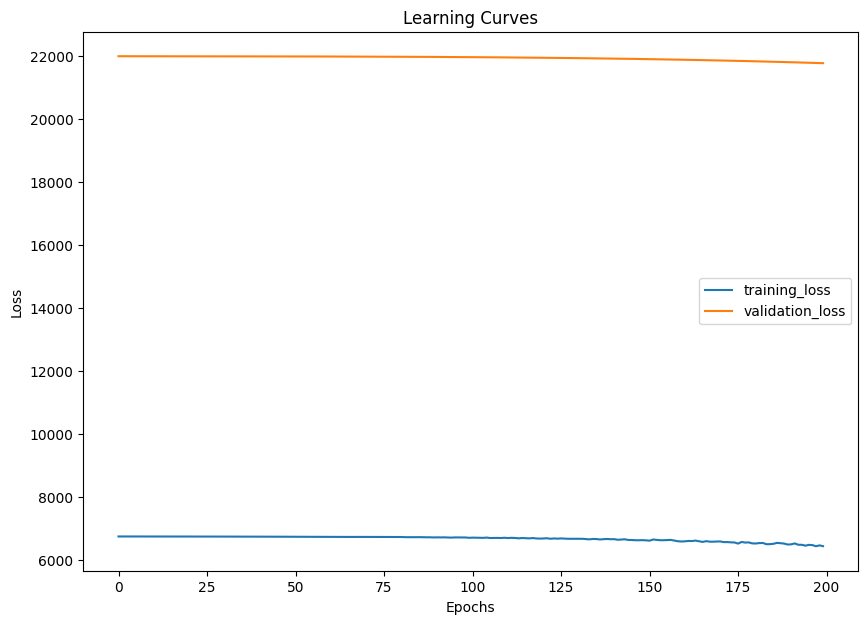

In [49]:
# Plot training and validation loss to visualize the learning curve
plt.figure(figsize=(10, 7))
plt.plot(history_4.history['loss'], label='training_loss')
plt.plot(history_4.history['val_loss'], label='validation_loss')
plt.legend()
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [50]:
# Make predictions using the trained model on the normalized test data
y_pred = model_4.predict(X_test_normal)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


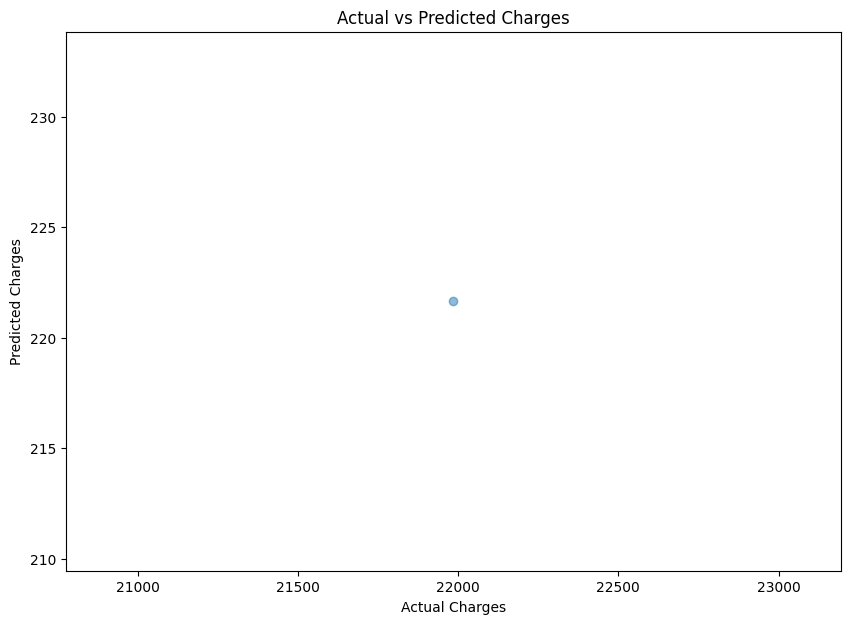

In [51]:
# Visualize actual vs predicted charges using a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

In [52]:
# Evaluate the fourth model
model_4.evaluate(X_test_normal, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 21762.8145 - mae: 21762.8145


[21762.814453125, 21762.814453125]

Hyperparameter Tuning for Neural Network using Keras Tuner
Using the Keras Tuner, perform hyperparameter tuning for a neural network model designed for regression tasks. The primary focus is on optimizing the following hyperparameters:

Units in the Dense layers: Between 32 and 512, in steps of 32.

Number of hidden layers: Between 1 and 5.

Dropout rate: Between 0.1 and 0.5, in increments of 0.1.

Learning rate for the optimizer: Among 0.01, 0.001, and 0.0001.

Parameters for the RandomSearch method include:

Objective: val_mae - which is the validation mean absolute error. The tuner will attempt to minimize this objective.

max_trials: 10 - This specifies that 10 different hyperparameter configurations will be tested. Note that this means that each time there would be 10 random parameter combinations.

executions_per_trial: 3 - For each configuration, the model will be trained three times to reduce variance.

directory: 'random_search' - Specifies the name of the directory where the results are stored.

project_name: 'insurance_regression' - Defines a name for this particular hyperparameter tuning task.

Please note that this task can take between 60 and 90 minutes to execute.



In [54]:
! pip install keras-tuner


In [55]:
from keras_tuner import RandomSearch

In [56]:
def build_model(hp):
    model = tf.keras.Sequential()
 
    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))  # Add dropout layer to mitigate overfitting
 
    # Iteratively add hidden layers, tuning the number of neurons and dropout rate
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))
        model.add(tf.keras.layers.Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
 
    model.add(tf.keras.layers.Dense(1))  # Output layer
 
    # Tune the learning rate for the optimizer from a set of predefined values
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=tf.keras.losses.mae,
                  metrics=['mae'])
 
    return model

In [57]:
# Set up the number of folds and max_trials
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,  # Test 10 different hyperparameter configurations
    executions_per_trial=3,  # Train each configuration 3 times to reduce variance
    directory='random_search',
    project_name='insurance_regression')

In [58]:
# Inspect the summary
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [59]:
# Commence the search for the most optimal hyperparameters
tuner.search(X_train_normal,
             y_train,
             epochs=200,  # Train each model for 200 epochs
             validation_data=(X_test_normal, y_test))

Trial 10 Complete [00h 02m 21s]
val_mae: 15686.97265625

Best val_mae So Far: 13879.7138671875
Total elapsed time: 00h 22m 47s


In [60]:
# Extract the best hyperparameters from the search
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
 
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 128 and the optimal learning rate for the optimizer
is 0.01.



Train and Visualize the Best Neural Network Model using Optimal Hyperparameters
Having determined the optimal hyperparameters using the Keras Tuner's Random Search, the next step is to construct and train the best neural network model using these hyperparameters. Once trained, visualize the learning curve to analyze the training and validation loss over epochs.

In [61]:
# Build the neural network model with the best hyperparameters from the tuning session
best_model = tuner.hypermodel.build(best_hps)

In [62]:
# Train the model on the training data for 200 epochs and validate on the test data
history_best = best_model.fit(X_train_normal,
                              y_train,
                              epochs=200,       # Total number of iterations over the dataset
                              validation_data=(X_test_normal, y_test))

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 6731.5693 - mae: 6731.5693 - val_loss: 21983.3926 - val_mae: 21983.3926
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 6730.4570 - mae: 6730.4570 - val_loss: 21977.8672 - val_mae: 21977.8672
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 6720.3096 - mae: 6720.3096 - val_loss: 21956.5957 - val_mae: 21956.5957
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 6699.1992 - mae: 6699.1992 - val_loss: 21885.9805 - val_mae: 21885.9805
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 6598.2144 - mae: 6598.2144 - val_loss: 21690.5391 - val_mae: 21690.5391
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 6285.9082 - mae: 6285.9082 - val_loss: 21205.7148 - val_mae: 21205.7148
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 5559.8477 - mae: 5559.8477 - val_loss: 20111.8438 - val_mae: 20111.8438
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 4628.4277 - mae: 4628.4277 

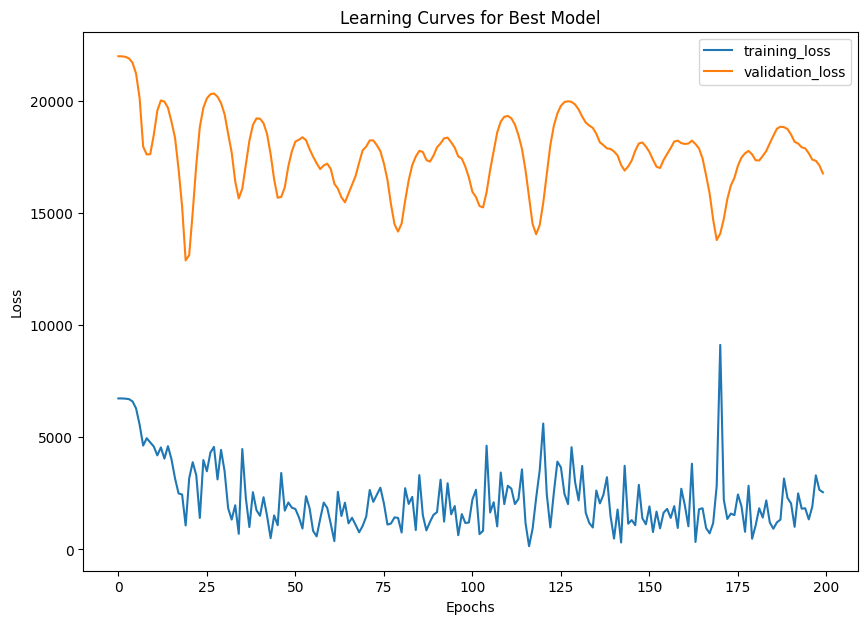

In [63]:
# Plot the learning curve of the best model, showing training and validation loss over epochs
plt.figure(figsize=(10, 7))
plt.plot(history_best.history['loss'], label='training_loss')
plt.plot(history_best.history['val_loss'], label='validation_loss')
plt.legend()
plt.title('Learning Curves for Best Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Save, Load, and Predict using the Trained Neural Network Model
To ensure our data pipeline remains efficient and we don't expend unnecessary resources retraining models, we need a procedure for saving and loading trained neural network models. The task involves saving the well-optimized neural network model to disk and subsequently retrieving it for future predictions without having to retrain.

In [64]:
# Save the trained model
best_model.save('best_model.keras') 

In [65]:
from tensorflow.keras.models import load_model
 
# Load the saved model from the HDF5 file
new_model = load_model('best_model.keras')

In [66]:
# Validate the loaded model's functionality on the test dataset
predictions = new_model.predict(X_test_normal)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
